# Basic tutorial with synthetic data

We start with loading test data. 

Then initializate the main class required to perform the resolved solar disk integration. The 'nr' argument specifies the number of radial segments and azimuthal segments to use in the computation.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from nessi.tester import load_data
from nessi import integrator as nss
import matplotlib.colors as mcolors
from astropy.io import fits as f
from scipy.interpolate import interp1d


In [3]:

data = np.load("C:/Users/Gebruiker/anaconda3/Lib/site-packages/nessi/data/syn_clv.npz")  

wav = data['wave'] # wavelengths
dc = data["spectra"] # intensities for those wavelengths? 
mu = data['mu']  # the mu of the cos(angle) made with line of sight? 
clv = data['clv'] # center to limb variations (what are those units? )

# wav, dc, mu, clv = load_data()  # here problem with full path eg C:\folder\folder\address.csv
saas = nss.sun_as_a_star(nr=101)

print(wav, len(wav),)
print(dc, len(dc))
print(mu, len(mu))
print(clv, len(clv))



[5000.   5000.02 5000.04 5000.06 5000.08 5000.1  5000.12 5000.14 5000.16
 5000.18 5000.2  5000.22 5000.24 5000.26 5000.28 5000.3  5000.32 5000.34
 5000.36 5000.38 5000.4  5000.42 5000.44 5000.46 5000.48 5000.5  5000.52
 5000.54 5000.56 5000.58 5000.6  5000.62 5000.64 5000.66 5000.68 5000.7
 5000.72 5000.74 5000.76 5000.78 5000.8  5000.82 5000.84 5000.86 5000.88
 5000.9  5000.92 5000.94 5000.96 5000.98 5001.   5001.02 5001.04 5001.06
 5001.08 5001.1  5001.12 5001.14 5001.16 5001.18 5001.2  5001.22 5001.24
 5001.26 5001.28 5001.3  5001.32 5001.34 5001.36 5001.38 5001.4  5001.42
 5001.44 5001.46 5001.48 5001.5  5001.52 5001.54 5001.56 5001.58 5001.6
 5001.62 5001.64 5001.66 5001.68 5001.7  5001.72 5001.74 5001.76 5001.78
 5001.8  5001.82 5001.84 5001.86 5001.88 5001.9  5001.92 5001.94 5001.96
 5001.98 5002.  ] 101
[0.99999929 0.99999879 0.99999798 0.99999666 0.99999454 0.99999117
 0.99998585 0.99997757 0.99996482 0.99994541 0.99991618 0.99987266
 0.99980857 0.99971526 0.99958093 0.9993897

There are 41 mu positions between 0 and 1.


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8656\3692982511.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8656\3692982511.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax =plt.subplot(132)


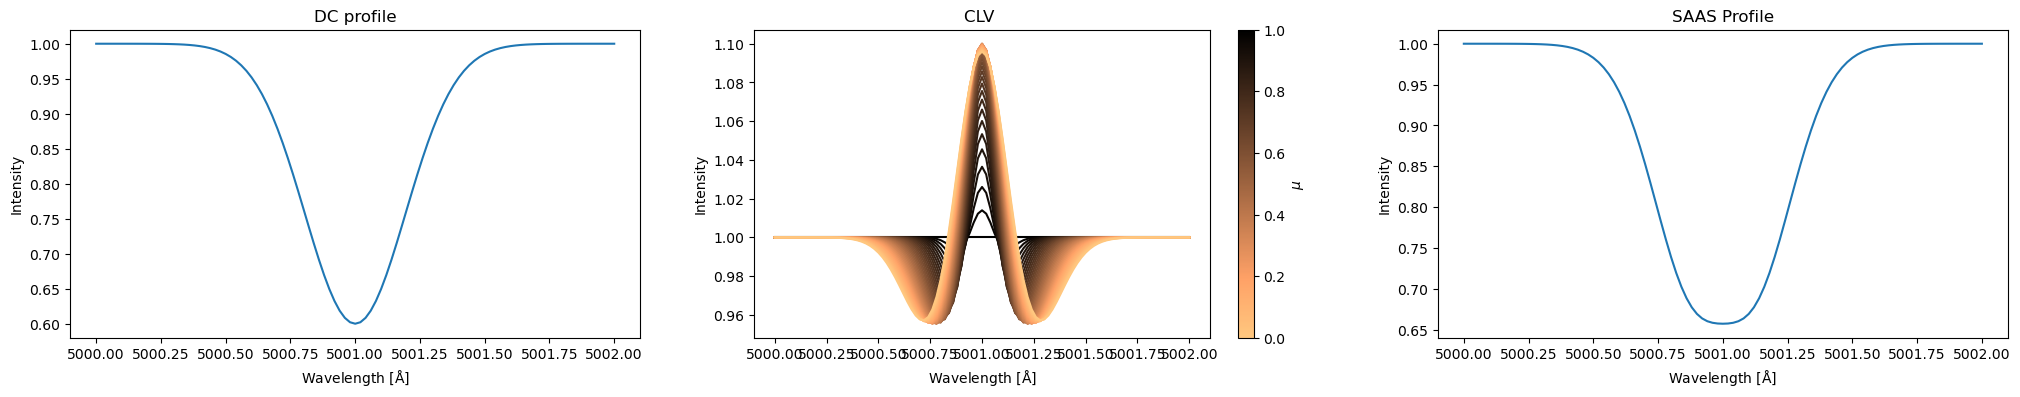

In [4]:
clv += 1

print(f"There are {len(mu)} mu positions between 0 and 1.")

#Load the observed/synthetic center to limb variation (clv) and the disk center reference spectrum (dc) 
#into the solar disk. Next update the solar differential rotation velocity profile, which takes the P0 and B0 angles
#as input. Finally, calculate the integrated spectrum.

saas.update_clv(mu,wav,clv,wav,dc)
saas.update_vrot(0.,0.)
test_si = saas.get_integration()

# create colormap
cm = plt.cm.copper(np.linspace(0, 1, len(mu)))

fig = plt.subplots(1, 2, figsize=(25,4))
plt.subplot(131)
plt.plot(wav, dc)
plt.title('DC profile')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')

ax =plt.subplot(132)
ax.set_prop_cycle('color', list(cm))
ax.plot(wav,clv.T)
plt.title('CLV ')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.copper, norm=norm)
sm_r = plt.cm.ScalarMappable(cmap=plt.cm.copper_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm_r, ax=ax)
cbar.set_label(r'$\mu$')

saas.update_clv(mu,wav,clv,wav,dc)
saas.update_vrot(0.,0.)
test_si = saas.get_integration()

plt.subplot(133)
plt.plot(wav, test_si)
plt.title('SAAS Profile')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')

plt.show()

# Using SST data
We can use CLV files from Pietrow et al (2023) for the quiet Sun

https://cdsarc.cds.unistra.fr/ftp/J/A+A/671/A130/fits/

We try with the 7772 Oxygen line below

Filename: 7772_clv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  WAV           1 ImageHDU         7   (23,)   float64   
  2  MU            1 ImageHDU         7   (50,)   float64   
  3  INT           1 ImageHDU         8   (50, 23)   float64   
  4  INT_SMOOTH    1 ImageHDU         8   (50, 23)   float64   
  5  INT_VAR       1 ImageHDU         8   (50, 23)   float64   
  6  INT_COUNT     1 ImageHDU         8   (50, 23)   float64   
  7  SST_INSTRUMENT_PSF    1 ImageHDU         8   (2, 73)   float64   


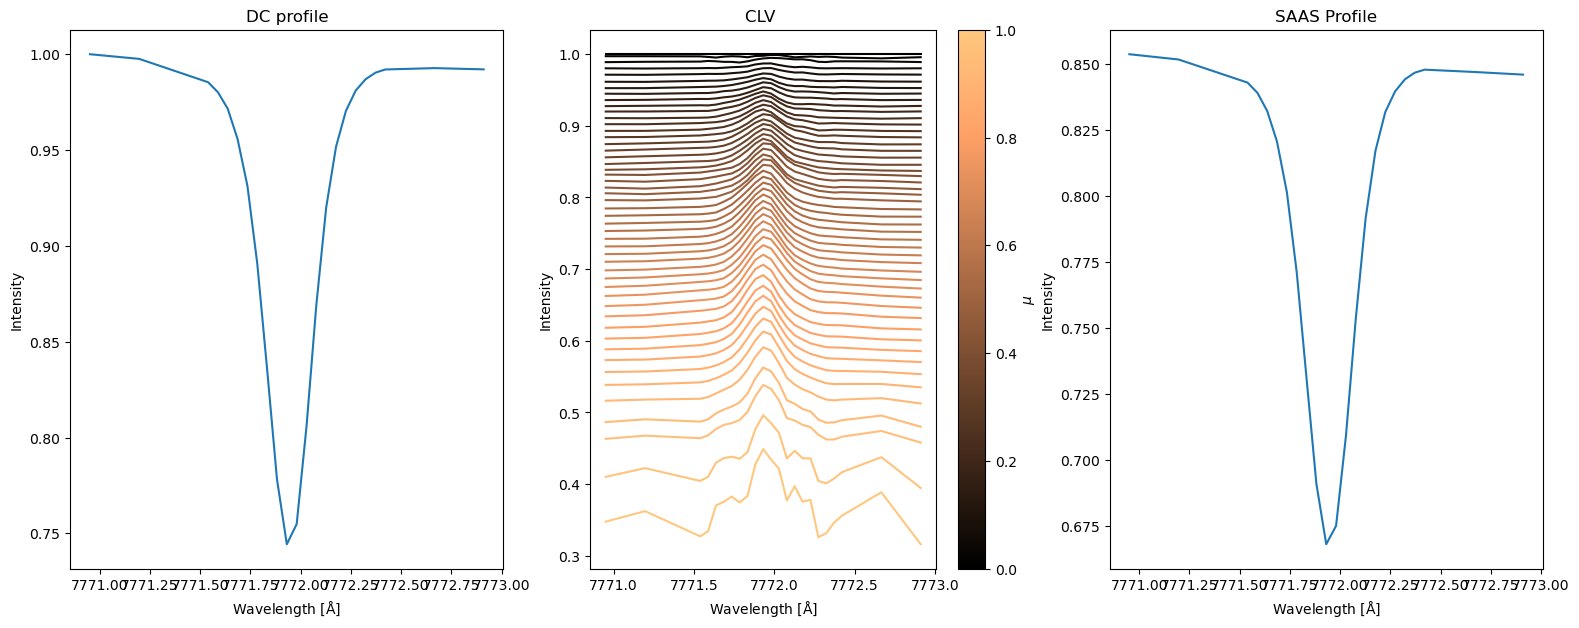

In [5]:
has = f.open('7772_clv.fits')
has.info()

sst_wav = has[1].data
sst_mu = has[2].data
sst_int = has[4].data.T

# CLV profiles should be normalized in such a way that at mu=1 it is is 1 all over, and the rest is above (or is it under?). 
sst_dc = sst_int[0]
sst_clv = sst_int.copy()
# sst_clv = sst_clv/sst_clv[0]
sst_clv /= sst_clv[0]

# sst_clv /= sst_clv[:,0, None]
# sst_clv = 1/sst_clv

# We remove the intensity varitions and then place them back base on neckle and labs 
# For better accuracy in intensity
# lbd2 = np.zeros_like(sst_mu)
# for i in range(len(sst_mu)):

#     lbd2[i] = nss._limbdarkening(7772, mu=sst_mu[i], nm=True)  # use path "C:\Users\Gebruiker\anaconda3\Lib\site-packages\ISPy\data\limbdarkening_Neckel_Labs_1994.fits"

# sst_clv2 = np.tile(lbd2, (23,1)).T

# # Add limb darkening to CLV
# sst_clv *= lbd2[:, None]
# sst_clv = 1/sst_clv
# sst_clv2 = 1/sst_clv2
# print(sst_clv.shape, sst_clv2.shape)
    
# create colormap
cm = plt.cm.copper(np.linspace(0,1, 50))

fig = plt.subplots(1, 3, figsize=(19,7))
plt.subplot(131)
plt.plot(sst_wav, sst_dc)
plt.title('DC profile')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')

ax =plt.subplot(132)
ax.set_prop_cycle('color', list(cm))
ax.plot(sst_wav,sst_clv.T)
plt.title('CLV ')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')
norm = mcolors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.copper, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r'$\mu$')

# ax1 = plt.subplot(133)
# ax1.set_prop_cycle('color', list(cm))
# ax1.plot(sst_wav,sst_clv2.T)
# plt.title('Limbdarkening ')
# plt.xlabel(r'Wavelength [$\rm\AA$]')
# plt.ylabel('Intensity')
# norm = mcolors.Normalize(vmin=0, vmax=1)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.copper, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax1)
# cbar.set_label(r'$\mu$')


saas.update_clv(sst_mu,sst_wav,sst_clv,sst_wav,sst_dc)
saas.update_vrot(0.,0.)
test_si = saas.get_integration()

plt.subplot(133)
plt.plot(sst_wav, test_si)
plt.title('SAAS Profile')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')


plt.show()


In [6]:
print("sst_wav:", sst_wav, "\nsst_mu:",sst_mu, "\nsst_int:", sst_int,"\n has:", has)


sst_wav: [7770.95101671 7771.19601671 7771.53901671 7771.58801671 7771.63701671
 7771.68601671 7771.73501671 7771.78401671 7771.83301671 7771.88201671
 7771.93101671 7771.98001671 7772.02901671 7772.07801671 7772.12701671
 7772.17601671 7772.22501671 7772.27401671 7772.32301671 7772.37201671
 7772.42101671 7772.66601671 7772.91101671] 
sst_mu: [1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18
 0.16 0.14 0.12 0.1  0.08 0.06 0.04 0.02] 
sst_int: [[1.         0.9975769  0.98540631 ... 0.99203748 0.99275123 0.9920999 ]
 [0.99726013 0.99479666 0.98245411 ... 0.98738653 0.98701892 0.98799859]
 [0.98894643 0.98703807 0.97528719 ... 0.98226768 0.98277524 0.98125494]
 ...
 [0.4631127  0.46646857 0.45720296 ... 0.46238129 0.47068218 0.45429327]
 [0.41011911 0.42115456 0.3984608  ... 0.41324986 0.43439879 0.39141216]
 [0.3475387  0.3613

In [7]:

#We include an atlas to compare the data with (always good to check if all works well!)
atlas = f.getdata('solar_atlas_V1_405-1065.fits')
atlas_w = np.arange(len(atlas)) * -0.003766534468 + 24700.0858041 
aw = 1e8 / atlas_w

#Cut the atlas near where the line is (Keep in mind that we use air wavelenths, 
# and they use vacuum, so youll need to shift it)
lw = sst_wav[0]
rw = sst_wav[-1]

llw = np.where(aw > lw-3)[0][0]
lrw = np.where(aw > rw+3)[0][0]

fd = atlas[llw:lrw]
fdw = aw[llw:lrw]

ff = interp1d(fdw, fd, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_wav)

Now we make a SAAS profile and roll the atlas profile to align the two

3499
crisp::read_reflectivity: (RL,RH)[7772.0] = (0.8576176912950555, 0.9227412365385039)
crisp::read_reflectivity: (RL,RH)[7772.0] = (0.8576176912950555, 0.9227412365385039)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.   0.  ]
 [0.07 0.  ]
 [0.14 0.  ]
 [0.21 0.  ]
 [0.28 0.  ]
 [0.35 0.  ]
 [0.42 0.  ]
 [0.49 0.  ]
 [0.56 0.  ]
 [0.63 0.  ]
 [0.7  0.  ]
 [0.77 0.  ]
 [0.84 0.  ]
 [0.91 0.  ]
 [0.98 0.  ]
 [1.05 0.  ]
 [1.12 0.  ]
 [1.19 0.  ]
 [1.26 0.  ]
 [1.33 0.  ]
 [1.4  0.  ]
 [1.47 0.  ]
 [1.54 

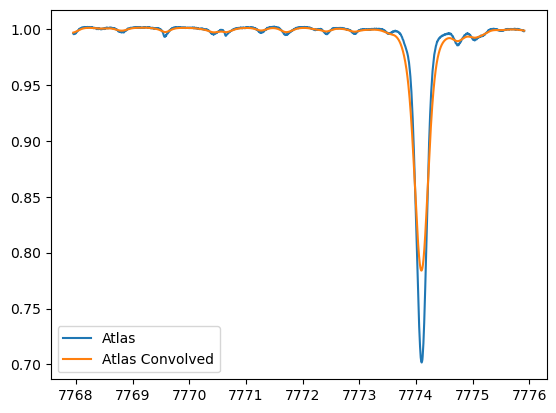

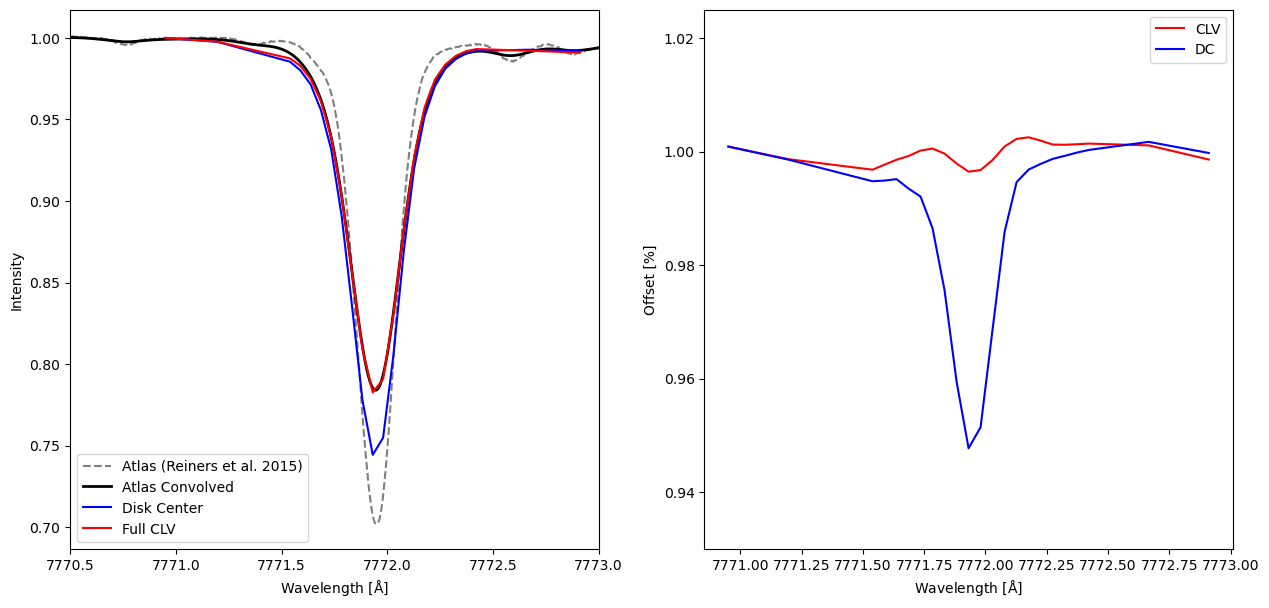

[0.99912966 0.99900019 0.99059052 0.98520907 0.97627017 0.96194512
 0.9386686  0.90285168 0.8564507  0.81109671 0.78538003 0.79334989
 0.83176915 0.88173986 0.92503585 0.95475711 0.97248091 0.98233159
 0.98769763 0.99055473 0.99175825 0.99105718 0.99234659]


In [9]:
#wav, dc, mu, clv = load_data()
saas = nss.sun_as_a_star(nr=101)
saas.update_clv(sst_mu,sst_wav,sst_clv,sst_wav,sst_dc)
saas.update_vrot(0.,0.)
test_si = saas.get_integration()

rv = -946
print(len(fdw))

#test_si = test_si/np.min(test_si)*np.min(test_si)
test_si = test_si/test_si[0]
sst_dc = sst_dc/sst_dc[0]
fdd = fdd/fdd[0]


import ISPy.spec.crisp as c
dw = 0.07
ntw = 59
tw = (np.arange(ntw)-ntw//2)*dw
fpife = c.crisp(7772)
fc = c.crisp(7772.0)
tr = fc.dual_fpi(tw, erh = -0.022) #6301-2

tr /= tr.sum()
inst_prof = np.zeros((len(tr),2))
print(inst_prof)
inst_prof[:,0] = tw+np.abs(tw.min())
print(inst_prof)
inst_prof[:,1] = tr

import ISPy.spec.calib as cb

print(fdw, fd, inst_prof)

aa = cb.convolve_atlas(fdw,fd,inst_prof)

aa2 = aa

print(len(fdw))

plt.plot(fdw,fd, label="Atlas")
plt.plot(fdw,aa, label="Atlas Convolved")
plt.legend()
plt.show()


ff = interp1d(fdw, np.roll(aa2,rv), kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_wav)


fig = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
plt.plot(fdw,np.roll(fd,rv), color='black', linestyle='--', alpha=0.5, label='Atlas (Reiners et al. 2015)')
plt.plot(fdw,np.roll(aa2,rv), color='black', lw=2, label='Atlas Convolved')
plt.plot(sst_wav, sst_dc, color='blue', label='Disk Center')
plt.plot(sst_wav, test_si, color='red', label='Full CLV')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Intensity')
plt.legend()
plt.xlim(7770.5,7773)

plt.subplot(122)
plt.plot(sst_wav, test_si/fdd, label='CLV', color='red')
plt.plot(sst_wav, sst_dc/fdd, label='DC', color='blue')
plt.xlabel(r'Wavelength [$\rm\AA$]')
plt.ylabel('Offset [%]')
plt.legend()

plt.ylim(0.93,1.025)
plt.show()

print(fdd)


In [19]:
np.max(test_si/fdd)
test_si
fdd

array([0.99912966, 0.99900019, 0.99059052, 0.98520907, 0.97627017,
       0.96194512, 0.9386686 , 0.90285168, 0.8564507 , 0.81109671,
       0.78538003, 0.79334989, 0.83176915, 0.88173986, 0.92503585,
       0.95475711, 0.97248091, 0.98233159, 0.98769763, 0.99055473,
       0.99175825, 0.99105718, 0.99234659])

If you just want to add one active region that already has CLV, etc in it (e.g. an observation), you can then just multiply the SAAS profile with an average spectrum of these observations times the weight of the two. e.g. the Sun is pi*(950")^2 and the SST FOV is 60x60"

This means that your factor is:

In [12]:
factor = 60**2 / (np.pi*950**2) 
print(factor)

0.001269712565386866
